In [2]:
!pwd

/Users/junhyeoungson/Downloads/글꼴/data/테스트폴더


In [3]:
# 모델을 불러온다
from keras.models import load_model
import os
model = load_model("./hand_written_korean_classification.hdf5")

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd


In [9]:
# 예측 함수

def test_function(model, image, num, labels):
    
    # model -> 케라스 모델
    '''
    model = 케라스 모델
    image = 사진 경로( 숫자 제외) 예시: './hangul-images/hangul_'
    num = 사진 번호 'hangul_2555'에서의 2555 넣으면 됨
    labels -> labels.txt 파일
    '''
    
    # 이미지 로드 후 보여주기
    test_image = cv2.imread(image + str(num) + '.jpeg')
    X_test_image = np.array(test_image)
    
    #배경색이 검정일 경우 반전
    X_test_image = 255 - X_test_image
    plt.imshow(X_test_image)
    plt.show()
    
    # 이미지 예측
    X_test_image = np.array(X_test_image)
    X_test_image = X_test_image.reshape(1,32,32,3) / 255.0
    
    pred = model.predict(X_test_image)
    pred_num = np.argmax(pred)
    print('예측한 글자는 "' + str(labels['글자'].iloc[pred_num]) + '" 입니다.')
    
    
    

In [13]:
!pwd

/Users/junhyeoungson/Downloads/글꼴/data/테스트폴더


In [27]:
labels = './label.txt'
labels = pd.read_csv(labels, encoding = 'utf-8', header = None)
labels.set_axis(['글자'],  axis='columns', inplace=True)

In [28]:
labels

,글자
0,가
1,각
2,간
3,갇
4,갈
...,...
975,흩
976,희
977,흰
978,히


In [29]:
!pwd

/Users/junhyeoungson/Downloads/글꼴/data/테스트폴더


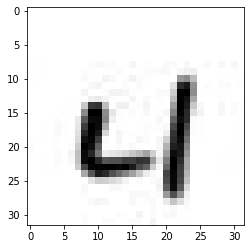

예측한 글자는 "니" 입니다.


In [35]:
image = '../data1/hangul-images/hangul_'
test_function(model,image,18579,labels )

